# Урок 3. Связь бизнес-показателей и DS-метрик

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import warnings
import pandas as pd
import statsmodels.api as sm

In [7]:
# Выделил специльно функции, чтобы не плодить код

def get_acf(values, lags = 24):
    sm.graphics.tsa.plot_acf(values, lags = lags)
    plt.show()

def get_pacf(values, lags = 24):
    sm.graphics.tsa.plot_pacf(values, lags = lags)
    plt.show()

def get_combination_parametrs():
    p = range(0, 3)
    d = range(0, 3)
    q = range(0, 3)

    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    print("Examples of parameter combinations for Seasonal ARIMA are:")
    print(f"SARIMAX: {pdq[1]} x {seasonal_pdq[1]}")
    print(f"SARIMAX: {pdq[1]} x {seasonal_pdq[2]}")
    print(f"SARIMAX: {pdq[2]} x {seasonal_pdq[3]}")
    print(f"SARIMAX: {pdq[2]} x {seasonal_pdq[4]}")
    return [pdq, seasonal_pdq]

def get_best_arima(value, lags = 24):
    warnings.filterwarnings("ignore") # отключает предупреждения

    [pdq, seasonal_pdq] = get_combination_parametrs()

    best_param = None
    best_seasonal = None
    best_AIC = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(value[:-lags],
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)

                results = mod.fit()

                print(f"ARIMA{param}x{param_seasonal}3 - AIC: {results.aic}")

                best_param = param
                best_seasonal = param_seasonal
                best_AIC = results.aic
                best_results = results

            except:
                continue

    print(f"Best parametrs:\n"
          f"ARIMA{best_param}x{best_seasonal}3\n"
          f"AIC: {best_AIC:.2f}")
    return { "best_results": best_results,
             "best_param": best_param,
             "best_seasonal": best_seasonal,
             "best_AIC": best_AIC }

## 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [49]:
df = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [50]:
df.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
Time               145374 non-null object
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 15.0+ MB


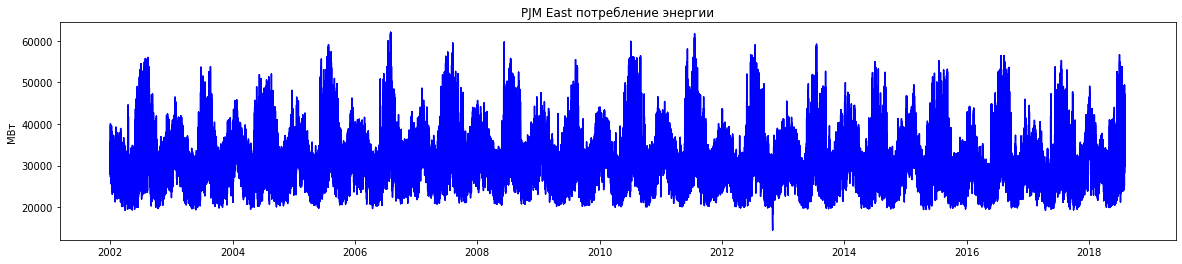

In [52]:
plt.figure(figsize =(20,4))
plt.plot(df.index, df['PJME_MW'], 'b')
plt.title('PJM East потребление энергии')
plt.ylabel ('МВт')
plt.show()

In [53]:
df_month = df.resample('M').mean()
df_month.head(5)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


## 2. Подберите параметры модели SARIMAX для этого ряда.

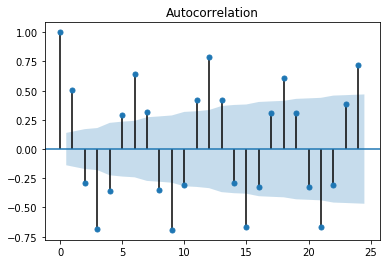

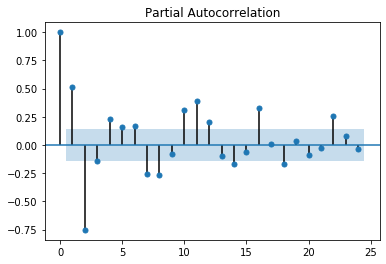

In [54]:
get_acf(df_month['PJME_MW'].values, lags = 24)
get_pacf(df_month['PJME_MW'].values, lags = 24)

In [55]:
best_arima_month = get_best_arima(df_month['PJME_MW'].values, lags = 24)

Examples of parameter combinations for Seasonal ARIMA are:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4134.131475716988
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:3741.7983696996453
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3443.566091841075
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:2934.763927613225
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2711.219816176256
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2480.6699168055748
ARIMA(0, 0, 0)x(0, 2, 0, 12)3 - AIC:2870.166217872918
ARIMA(0, 0, 0)x(0, 2, 1, 12)3 - AIC:2600.8866458075227
ARIMA(0, 0, 0)x(0, 2, 2, 12)3 - AIC:2358.1746030202567
ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:2957.3964747452537
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:2936.794299461204
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:2692.5660408151875
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:2720.3768526623526
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:2703.3657456937185
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2

## 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [56]:
best_arima_week = get_best_arima(df_month['PJME_MW'].values, lags = 12)
print(f"AIC: {best_arima_week['best_AIC']}")

Examples of parameter combinations for Seasonal ARIMA are:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4015.360574279173
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3714.4659328110947
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3153.6893700282526
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2927.716207132726
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2695.322317184129
ARIMA(0, 0, 0)x(0, 2, 0, 12)3 - AIC:3105.220816585148
ARIMA(0, 0, 0)x(0, 2, 1, 12)3 - AIC:2919.4733029935014
ARIMA(0, 0, 0)x(0, 2, 2, 12)3 - AIC:2583.2264355113293
ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:3175.9348958198534
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:3155.892192274799
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:2907.0867482279687
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:2936.8136902934625
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:2919.9376138675943
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2

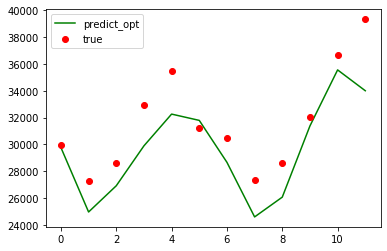

In [35]:
pred_dynamic = best_arima_week["best_results"].forecast(12)

plt.plot(pred_dynamic, 'g', label='predict_opt' )
plt.plot(df_month['PJME_MW'].values[-12:], 'or', label='true')

plt.legend()

plt.show()

__При сравнении месячной и недельной моделей, месячная показывает куда лучше результат__

## 4. Постройте ACF, PACF и модель ARIMA для BRENT (недельный)

In [9]:
df = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])

df.head(5)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 11 columns):
Значение           2667 non-null float64
year               2667 non-null int64
month              2667 non-null int64
dayofmonth         2667 non-null int64
quarter            2667 non-null int64
dayofyear          2667 non-null int64
weekofyear         2667 non-null int64
dayofweek          2667 non-null int64
is_holiday         2667 non-null int64
is_prev_holiday    2667 non-null int64
is_next_holiday    2667 non-null int64
dtypes: float64(1), int64(10)
memory usage: 250.0 KB


In [11]:
df_week = df.resample('W').mean()

df_week.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Text(0.5, 0, 't')

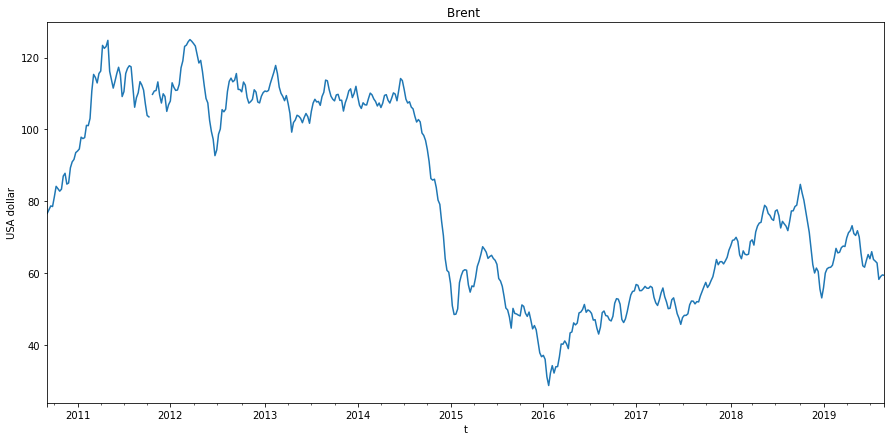

In [14]:
_ = df_week['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [15]:
df_week['2011-08-01' : '2011-11-30']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-08-07,111.728333,2011.0,8.000000,3.666667,3.000000,215.666667,31.0,2.666667,0.000000,0.000000,0.000000
2011-08-14,106.168333,2011.0,8.000000,10.666667,3.000000,222.666667,32.0,2.666667,0.000000,0.000000,0.000000
2011-08-21,108.843333,2011.0,8.000000,17.666667,3.000000,229.666667,33.0,2.666667,0.000000,0.000000,0.000000
2011-08-28,110.201667,2011.0,8.000000,24.666667,3.000000,236.666667,34.0,2.666667,0.000000,0.000000,0.000000
2011-09-04,113.291667,2011.0,8.500000,16.166667,3.000000,243.666667,35.0,2.666667,0.000000,0.166667,0.000000
2011-09-11,112.366667,2011.0,9.000000,7.666667,3.000000,250.666667,36.0,2.666667,0.166667,0.000000,0.166667
2011-09-18,110.946667,2011.0,9.000000,14.666667,3.000000,257.666667,37.0,2.666667,0.000000,0.000000,0.000000
2011-09-25,107.106667,2011.0,9.000000,21.666667,3.000000,264.666667,38.0,2.666667,0.000000,0.000000,0.000000
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.000000,0.000000,0.000000


In [16]:
df_week.loc['2011-10-16'] = (df_week.loc['2011-10-09'] + df_week.loc['2011-10-23'])/2

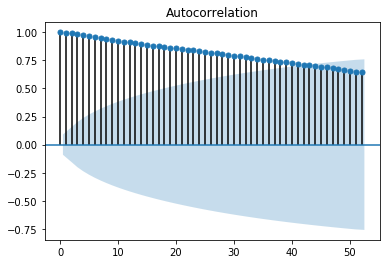

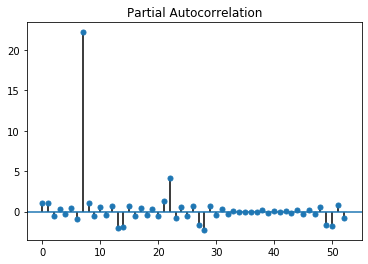

In [17]:
get_acf(df_week['Значение'].values, lags = 52)
get_pacf(df_week['Значение'].values, lags = 52)

In [18]:
best_param_brent = get_best_arima(df_week['Значение'].values, lags = 12)

Examples of parameter combinations for Seasonal ARIMA are:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC: 5365.706776833265
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC: 4716.560833545184
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC: 4217.490431121129
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC: 3412.4453979487075
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC: 3315.9294084925978
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC: 3184.7291744454474
ARIMA(0, 0, 0)x(0, 2, 0, 12)3 - AIC: 3643.9054822126072
ARIMA(0, 0, 0)x(0, 2, 1, 12)3 - AIC: 3283.747458263934
ARIMA(0, 0, 0)x(0, 2, 2, 12)3 - AIC: 3172.163999564321
ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC: 3417.868070759963
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC: 3410.995952582724
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC: 3305.6131351351783
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC: 3325.378833043437
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC: 3298.877257965868
ARIMA(0, 0, 0)x(1, 1, 2, 1

## 5. Оцените результат моделирования

In [20]:
adf_test = sm.tsa.stattools.adfuller(best_param_brent['best_results'].resid)
print(adf_test)

(-5.752446165554695, 5.923489347730567e-07, 17, 440, {'1%': -3.445299682487321, '5%': -2.8681312035123967, '10%': -2.570280872933884}, 2243.7761107359174)


Т.к. adf_test[1] > 0, она показывает, что ряд не является стационарным (что немного странно, т.к. казалось, что ряд должен был быть стационарным) и судя по всему ряд отвечает на вопрос о поведении ряда во времени.

## 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

По моему мнению, модели ARIMA отлично работают с:
1. Рядами данных, которые является стационарным, что означает, что среднее значение и дисперсия не должны изменяться со временем. Ряд может быть сделан стационарным взятием разностей некоторого порядка от исходного временного ряда.
2. Данные, предоставляемые в качестве входных данных, должны быть одномерной последовательностью, поскольку arima использует прошлые значения для прогнозирования будущих значений.